In [30]:
# for data analysis and wrangling
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('consolidated_data.csv')
print(df.columns.values)

['deviceIORate' 'cpu' 'memory' 'conns' 'arrivalRate' 'ioLoad' 'cpuLoad'
 'responseTime']


In [32]:
df.head()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
0,50,1,700,25,1,0,350,14.6
1,50,1,700,25,1,0,400,15.1
2,50,1,700,25,1,0,450,15.1
3,50,1,700,25,1,0,500,14.6
4,50,1,700,25,1,20,350,23.8


In [33]:
# preview the data
df.tail()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
12513,50,4,800,100,20,180,500,878958.3
12514,50,4,800,100,20,200,350,827122.4
12515,50,4,800,100,20,200,400,1105585.7
12516,50,4,800,100,20,200,450,539449.2
12517,50,4,800,100,20,200,500,477299.5


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceIORate,12518.0,50.000000,0.000000,50.0,50.00,50.0,50.00,50.0
cpu,12518.0,2.687170,1.488336,1.0,1.00,4.0,4.00,4.0
memory,12518.0,745.869947,49.831125,700.0,700.00,700.0,800.00,800.0
conns,12518.0,58.655536,27.023705,25.0,25.00,50.0,75.00,100.0
arrivalRate,12518.0,10.177504,5.718124,1.0,5.00,10.0,15.00,20.0
ioLoad,12518.0,99.904138,63.248007,0.0,40.00,100.0,160.00,200.0
cpuLoad,12518.0,424.992012,55.903932,350.0,362.50,400.0,450.00,500.0
responseTime,12518.0,111764.966688,217321.774190,8.5,4240.85,29469.1,93288.25,2008239.3


## Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

- Correlating
We want to know how well does each feature correlate with Response Time.

- Completing
Since there are no missing values we do not need to complete any values.

- Correcting
Since deviceIORate is not changes we will be able to drop it from the dataset.

We will further analyze the data to validate some of our assumptions.

<Axes: title={'center': 'Pearson Correlation Matrix'}>

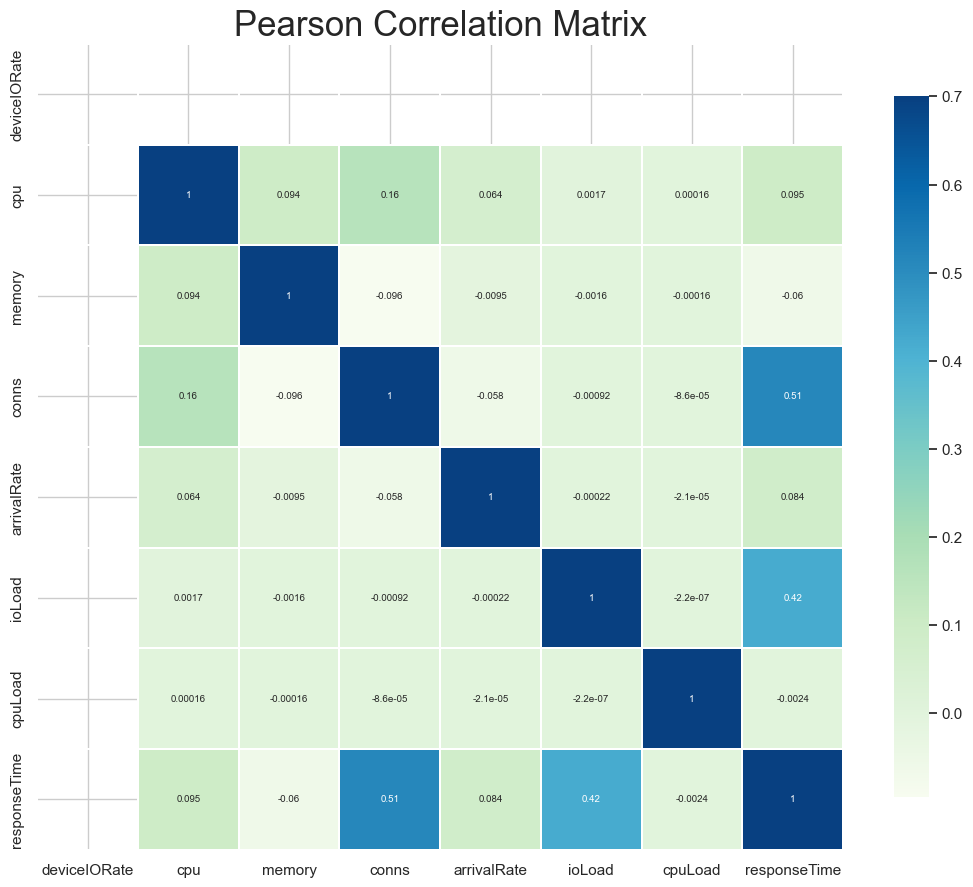

In [35]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [36]:
response_time_corr = df.corr()['responseTime'].sort_values(ascending=False)
print(response_time_corr)

responseTime    1.000000
conns           0.513892
ioLoad          0.422268
cpu             0.094844
arrivalRate     0.084401
cpuLoad        -0.002370
memory         -0.060463
deviceIORate         NaN
Name: responseTime, dtype: float64


In [37]:
df.drop(['deviceIORate'], axis=1, inplace=True)

In [38]:
# Features
X = df.drop('responseTime',axis=1)

# Label
y = df['responseTime']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8762, 6)
(3756, 6)
(8762,)
(3756,)


In [39]:
scaler = StandardScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))
y_train = scaler.fit_transform(y_train.reshape(-1,1))

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.7103968322501557
Min:  -1.5958063612771007


In [40]:
model = Sequential()
learning_rate = 0.001

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=learning_rate),loss='mse')

In [41]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=500)

Epoch 1/500
69/69 [==============================] - 1s 2ms/step - loss: 0.6941 - val_loss: 0.4134
Epoch 2/500
69/69 [==============================] - 0s 855us/step - loss: 0.2606 - val_loss: 0.1769
Epoch 3/500
69/69 [==============================] - 0s 848us/step - loss: 0.1564 - val_loss: 0.1363
Epoch 4/500
69/69 [==============================] - 0s 841us/step - loss: 0.1257 - val_loss: 0.1190
Epoch 5/500
69/69 [==============================] - 0s 834us/step - loss: 0.1107 - val_loss: 0.1132
Epoch 6/500
69/69 [==============================] - 0s 856us/step - loss: 0.1014 - val_loss: 0.1056
Epoch 7/500
69/69 [==============================] - 0s 845us/step - loss: 0.0943 - val_loss: 0.1016
Epoch 8/500
69/69 [==============================] - 0s 822us/step - loss: 0.0925 - val_loss: 0.0988
Epoch 9/500
69/69 [==============================] - 0s 839us/step - loss: 0.0878 - val_loss: 0.0946
Epoch 10/500
69/69 [==============================] - 0s 830us/step - loss: 0.0855 - val_loss

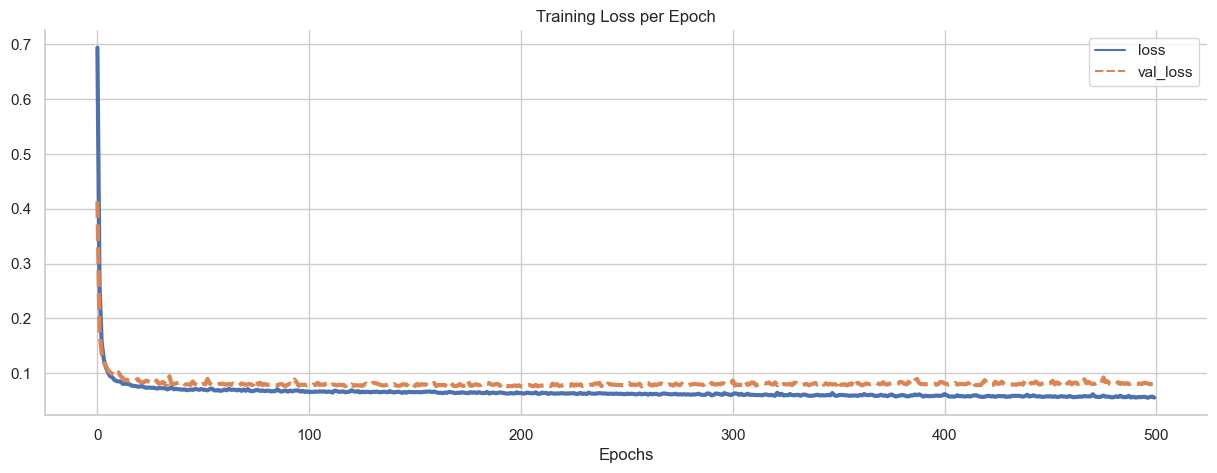

In [42]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [43]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

118/118 [==============================] - 0s 368us/step
MAE:  0.11634945540559988
MSE:  0.08027121436457418
RMSE:  0.2833217506026923
Variance Regression Score:  0.9198088480379226
MAPE:  0.4272824010550787


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

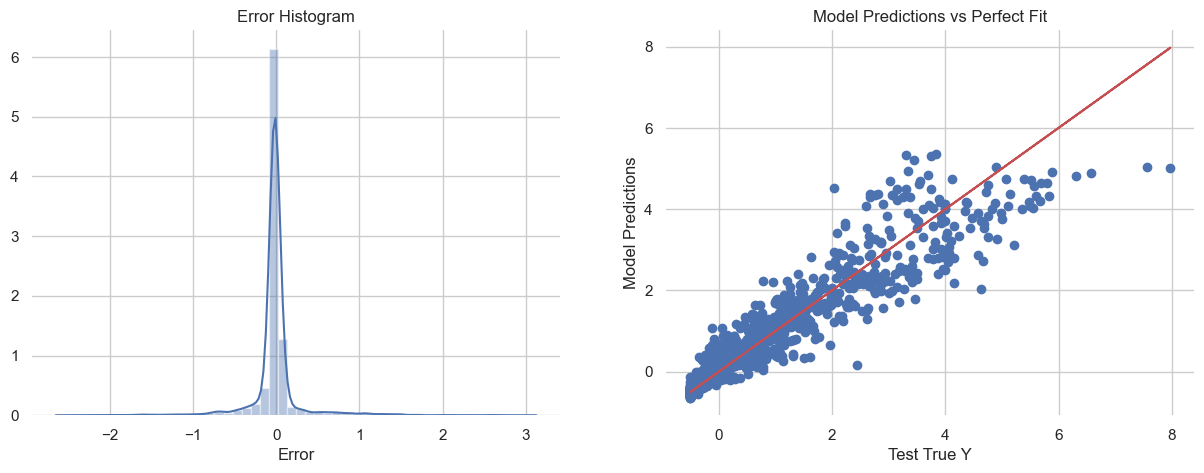

In [44]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

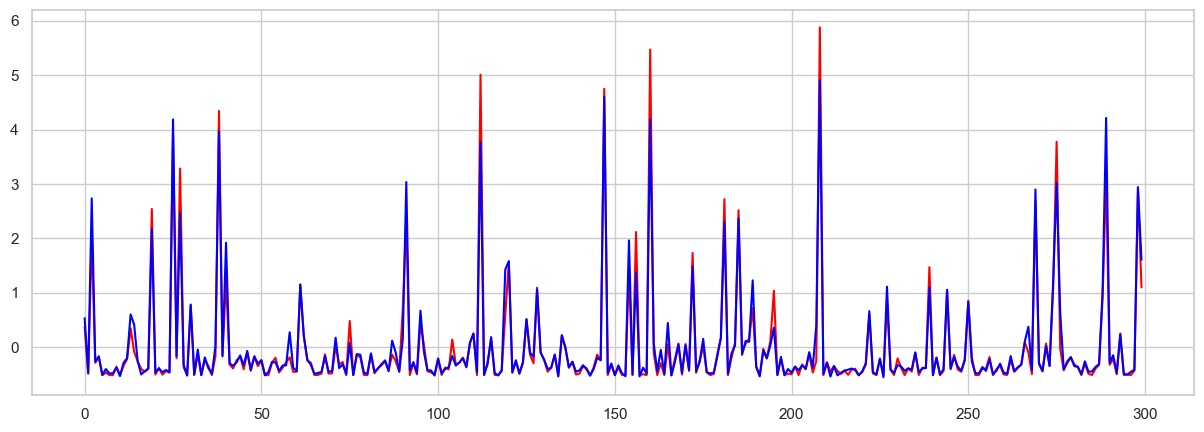

In [45]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()


In [46]:
# TODO: add a new data point and predict the response time

# fueatures of new house
new_data = df.drop('responseTime',axis=1).iloc[80]
print(f'Features of new data:\n{new_data}')

new_data = np.array(new_data)



# reshape the numpy array and scale the features
new_system = scaler.fit_transform(new_data.reshape(-1, 1))

predicted_response_time = model.predict(new_system)[0,0]
predicted_response_time = scaler.inverse_transform(predicted_response_time)

# run the model and get the price prediction
print('\nPredicted Response Time:',predicted_response_time)

# original price
print('\nOriginal Response Time:',df.iloc[80]['responseTime'])

Features of new data:
cpu              1
memory         700
conns           25
arrivalRate      2
ioLoad         180
cpuLoad        350
Name: 80, dtype: int64


2023-05-10 23:04:42.937484: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [6,1], In[1]: [6,19]
	 [[{{node sequential_1/dense_5/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_5/Relu' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/ricky/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/ricky/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/ricky/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ricky/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1230259/4072169696.py", line 14, in <module>
      predicted_response_time = model.predict(new_system)[0,0]
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/ricky/.local/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_5/Relu'
Matrix size-incompatible: In[0]: [6,1], In[1]: [6,19]
	 [[{{node sequential_1/dense_5/Relu}}]] [Op:__inference_predict_function_320963]